In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Import and suppress warnings
import warnings
#warnings.filterwarnings('ignore')

# Data exploration

## Load and describe dataset

In [2]:
attrition = pd.read_csv('../input/WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
# Looking for NaN
attrition.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

Let's manually exclude some features which are definitely not relevant, and will confuse our models. Suspicious features are EmployeeCount, EmployeeNumber, StandardHours.

In [6]:
print("EmployeeCount values: %s" % (attrition.EmployeeCount.unique()))
print("EmployeeNumber unique count: %d Total rows: %d" % (attrition.EmployeeNumber.unique().size, attrition.shape[0]))
print("EmployeeCount values: %s" % (attrition.StandardHours.unique()))

EmployeeCount values: [1]
EmployeeNumber unique count: 1470 Total rows: 1470
EmployeeCount values: [80]


So it appears that we can drop all this stuff from dataset, since 2 items are just constants, probably used for feature extraction during dataset formation, and one is just unique employee number, which will confuse models, especially after using oversampling techniques.

In [7]:
attrition.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1, inplace=True)

## Correlation of Features

Now let's find out if there are many correlated factors by printing correlation heatmap.

In [8]:
# Encode attrition target atttibute as numeric so it participates in correlation matrix
target_map = {'Yes':1, 'No':0}
attrition["Attrition"] = attrition["Attrition"].apply(lambda x: target_map[x])

In [9]:
attrition._get_numeric_data().head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2


Another thing we should be aware of is that there are numerical fields which are actually categorical:

Education:
1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction:
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement:
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction:
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating:
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction:
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance:
1 'Bad' 2 'Good' 3 'Better' 4 'Best'

This representation is weak monotonic mapping from real metrics to integers, so let it be. Probably it would be better to change it to one-hot encoding, for methods other than decision trees to work better.

In [18]:
# creating a list of only numerical values
numerical_data = attrition._get_numeric_data()
layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
)
fig = go.Figure(data=[
    go.Heatmap(
        z=numerical_data.astype(np.float64).corr().values, # Generating the Pearson correlation
        x=numerical_data.columns.values,
        y=numerical_data.columns.values,
        colorscale='Viridis',
        reversescale = False,
        text = True ,
        opacity = 1.0
        
    )
], layout=layout)
py.iplot(fig, filename='labelled-heatmap')

### Takeaway from the correlation plot

From the correlation plots, we can see that quite a lot of our columns seem to be poorly correlated with one another. So there is no point of using PCA at this moment.
Regarding Attrition feature, we can see that generally it is not much correlated with other features, however the features which produce maximum absolute correlation with Attrition are:
- Age
- JobInvolvement
- JobLevel
- MonthlyIncome
- StockOptionLevel
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsWithCurrentManager

JobLevel and MonthlyIncome are highly correlated between each other, same with (YearsAtCompany, YearsInCurrentRole, YearsWithCurrentManager), so basically they can be reduced into one geature per set.

## Pairplot Visualisations

Now let's plot some pairwise dependencies.

/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



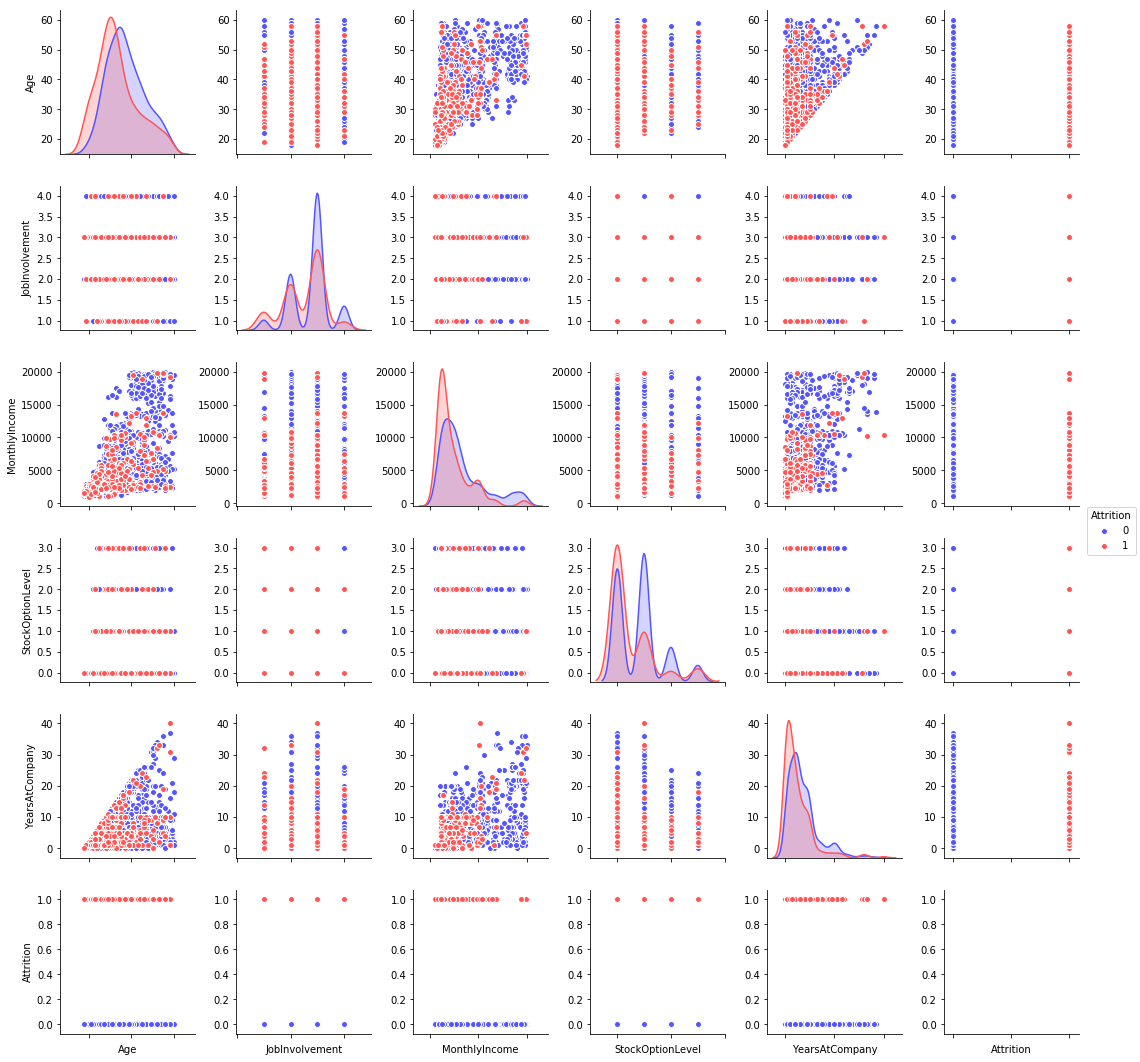

In [11]:
# Refining our list of numerical variables
numerical = [u'Age', u'JobInvolvement',  u'MonthlyIncome',
       u'StockOptionLevel', u'YearsAtCompany', u'Attrition']

g = sns.pairplot(attrition[numerical], hue='Attrition', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])

Interesting fact we can see from this plot is that most part of exhausted workers worked for no longer than 10 years, and mostly their monthly income is not higher than 11000$.

# Feature Engineering & Categorical Encoding

Having carried out a brief exploration into the dataset, let us now proceed onto the task of Feature engineering and numerically encoding the categorical values in our dataset.


To start off, we shall perform one-hot encoding of categorical items using get_dummies method.

In [12]:
categorical = []
for col, value in attrition.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
print(categorical)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [13]:
data = pd.get_dummies(attrition,columns=categorical,drop_first=True)
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0


One thing left to go is to split dataset into input features and target variable.

In [14]:
data_input = data.drop(['Attrition'], axis=1)
data_target = data['Attrition']

Let's check the target value distribution within given dataset:

In [15]:
py.iplot([go.Bar(
            x=data["Attrition"].value_counts().index.values,
            y= data["Attrition"].value_counts().values
    )], filename='basic-bar')

Therefore we have to keep in mind that there is quite a big imbalance in our target variable. Many statistical techniques have been put forth to treat imbalances in data (oversampling or undersampling). In this notebook, I will use an oversampling technique known as SMOTE to treat this imbalance.

Let's take a look at our correlation plot again, after introducing dummy one-hot encoding.

In [19]:
# creating a list of only numerical values
numerical_data = data._get_numeric_data()
layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
)

fig = go.Figure(data=[
    go.Heatmap(
        z=numerical_data.astype(np.float64).corr().values, # Generating the Pearson correlation
        x=numerical_data.columns.values,
        y=numerical_data.columns.values,
        colorscale='Viridis',
        reversescale = False,
        text = True ,
        opacity = 1.0
        
    )
], layout=layout)
py.iplot(fig, filename='labelled-heatmap')

It appears that there are several correlated pairs, which can be reduced by using PCA or other reduction algorithm.

# Implementing Models

## Sampling from dataset

In [25]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier

# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_test = train_test_split(data_input, data_target, train_size= 0.7,random_state=0)

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



Since we have already noted the severe imbalance in the values within the target variable, let us implement the SMOTE method in the dealing with this skewed value via the imblearn Python package.

In [26]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(train,target_train)

Another way to bear imbalance is to make dummy random oversampling from minor class.

In [44]:
from sklearn.utils import resample
count_no = (target_train == 0).sum()
resample_train, resample_target = resample(train[target_train == 1],
                                           target_train[target_train == 1], n_samples=count_no)
resample_train = pd.concat((train[target_train == 0], resample_train))
resample_target = pd.concat((target_train[target_train == 0], resample_target))

We will fix the random seed for further models.

In [28]:
seed = 42

Now let's create some wrappers around GridSearchCV and our datasets to find correct hyperparameters using CV folding.

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

def __hyperopt_helper(classifier, X, y, params, cv):
    grid = GridSearchCV(classifier, params, cv=cv, scoring=make_scorer(f1_score, pos_label=1))
    grid.fit(X, y)
    print(grid.best_params_)
    return grid

def smote_hyperopt(classifier, params, cv=5):
    return __hyperopt_helper(classifier, smote_train, smote_target, params, cv)

def resample_hyperopt(classifier, params, cv=5):
    return __hyperopt_helper(classifier, resample_train, resample_target, params, cv)

## 1. Random Forest Classifier 

In [53]:
# rf_base = RandomForestClassifier(n_jobs=-1, min_samples_split=50)
# rf_param_grid = {
#     'n_estimators' : [500, 600, 700, 800, 900, 1000],
#     'max_depth' : [5, 7, 9, 11],
#     'min_samples_leaf' : [5, 10],
# }
# rf_grid_smote = smote_hyperopt(rf_base,rf_param_grid)
# rf_grid_resamp = resample_hyperopt(rf_base,rf_param_grid)

{'max_depth': 11, 'min_samples_leaf': 5, 'n_estimators': 1000}
{'max_depth': 11, 'min_samples_leaf': 5, 'n_estimators': 600}


In [73]:
# Random Forest parameters
rf = RandomForestClassifier(
    n_jobs=-1,
    n_estimators=1000,
    warm_start=True,
    max_depth=7,
    min_samples_split=50,
    min_samples_leaf=5,
    random_state=seed,
    verbose=0)

In [74]:
# fit smote preprocessed sample
rf.fit(smote_train, smote_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=True)

In [75]:
rf_predictions = rf.predict(test)

             precision    recall  f1-score   support

          0       0.90      0.98      0.94       371
          1       0.78      0.40      0.53        70

avg / total       0.88      0.89      0.87       441



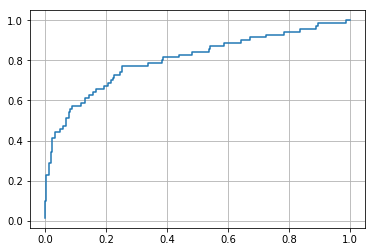

In [76]:
print(classification_report(target_test, rf_predictions))
tpc, fpc, tsh = roc_curve(target_test, rf.predict_proba(test)[:, 1], pos_label=1)
fig, ax = plt.subplots()
ax.grid()
_ = ax.plot(tpc, fpc)

### Visualising Tree Diagram with Graphviz

Let's print possible tree from trained forest.

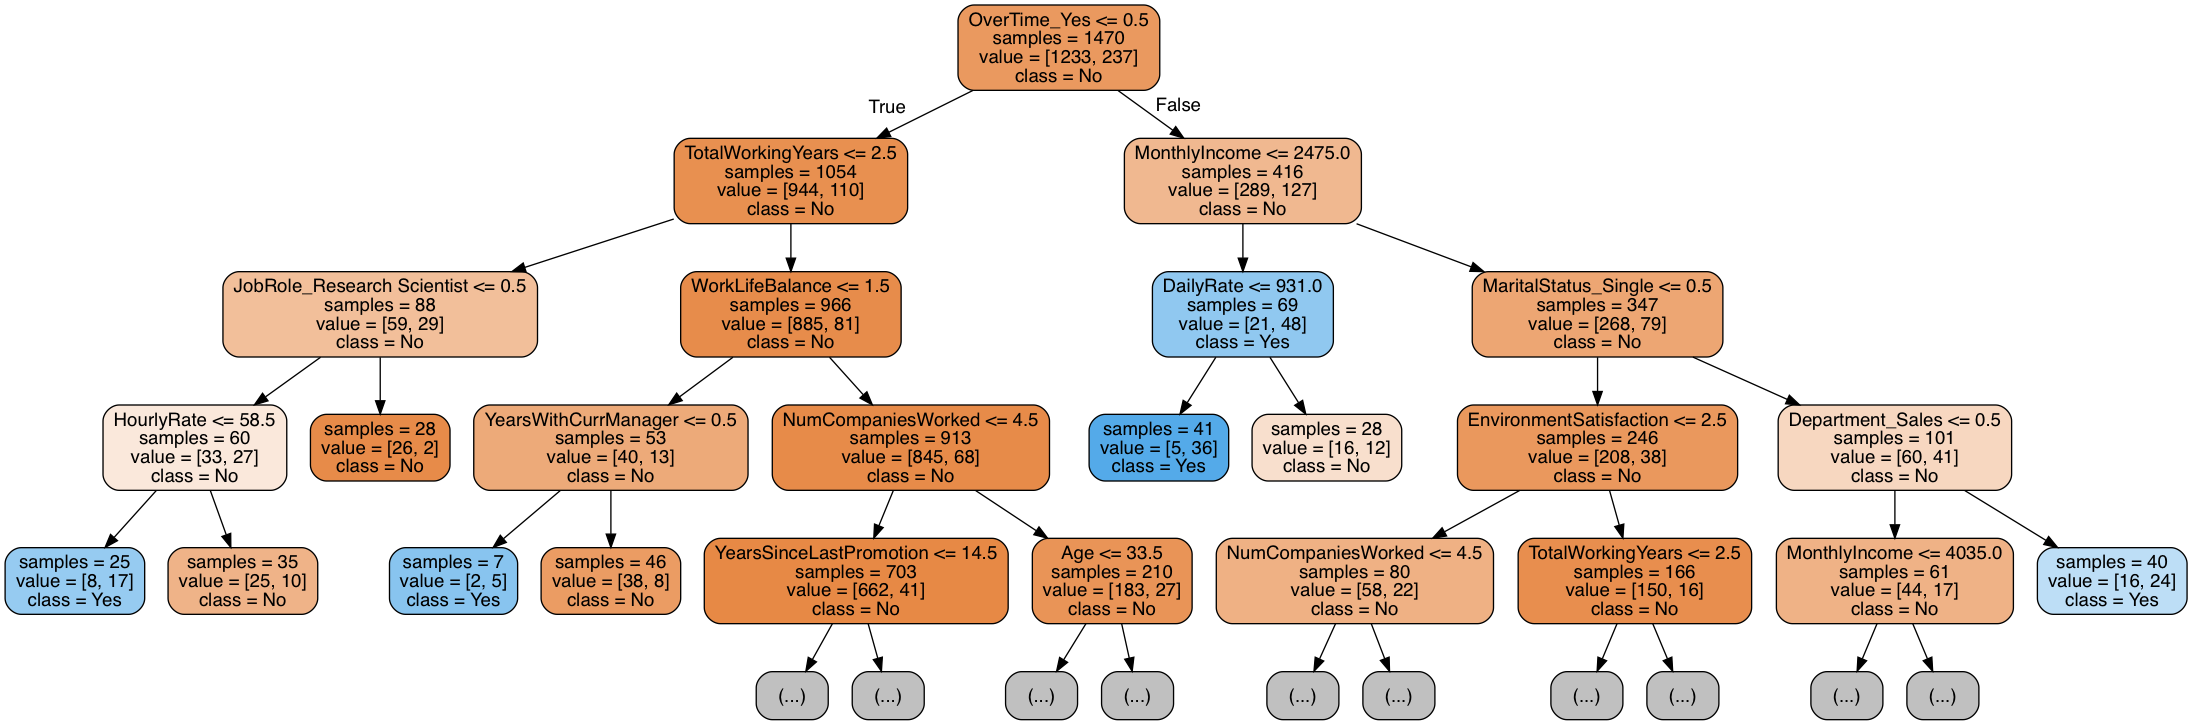

In [77]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call

# train dummy tree with given parameters
decision_tree = tree.DecisionTreeClassifier(
    max_depth=7,
    min_samples_split=50,
    min_samples_leaf=5,
    random_state=seed)
decision_tree.fit(data_input, data_target)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = data_input.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
check_call(['dot','-Tpng','tree1.dot','-o','sample-out.png'])

# Show tree diagram
PImage("sample-out.png")

Now let's print out the most important features 

In [78]:
layout= go.Layout(
    autosize= True,
    title= 'Random Forest Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=[go.Scatter(
    y = rf.feature_importances_,
    x = data_input.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = data_input.columns.values
)], layout=layout)
py.iplot(fig,filename='scatter')

## 2. Gradient Boosted Classifier

In [79]:
# gb_base = GradientBoostingClassifier(
#     max_features=0.9,
#     learning_rate=0.2,
#     subsample=0.6,
#     random_state=seed)
# gb_param_grid = {
#     'n_estimators' : [500, 700, 900, 1000],
#     'max_depth'    : list(range(1, 10, 2)),
#     'max_features' : [0.5, 0.9],
# }
# gb_grid_smote = smote_hyperopt(gb_base,gb_param_grid)
# gb_grid_resamp = resample_hyperopt(gb_base,gb_param_grid)

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.6,
    max_depth=11,
    min_samples_leaf=10,
    subsample=0.6,
    random_state=seed,
    verbose=0)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(test)

In [116]:
print("Accuracy: %f\n" % (accuracy_score(target_test, gb_predictions)))
print(classification_report(target_test, gb_predictions))

Accuracy: 0.882086

             precision    recall  f1-score   support

          0       0.90      0.97      0.93       371
          1       0.72      0.41      0.53        70

avg / total       0.87      0.88      0.87       441




### Feature Ranking via the Gradient Boosting Model

Much like the Random Forest, we can invoke the feature_importances_ attribute of the gradient boosting model and dump it in an interactive Plotly chart

In [59]:
layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)

fig = go.Figure(data=[go.Scatter(
    y = gb.feature_importances_,
    x = data_input.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = data_input.columns.values
)], layout=layout)
py.iplot(fig,filename='scatter')

## 3. AdaBoost with decision trunks

In [67]:
adb = GradientBoostingClassifier(
    loss='exponential',
    n_estimators=700,
    max_features=0.5,
    learning_rate=0.2,
    max_depth=11,
    min_samples_leaf=10,
    subsample=0.6,
    random_state=seed,
    verbose=0)
# Fit the model to our SMOTEd train and target
adb.fit(smote_train, smote_target)
# Get our predictions
adn_predictions = gb.predict(test)

In [68]:
print("Accuracy: %f\n" % (accuracy_score(target_test, adn_predictions)))
print(classification_report(target_test, adn_predictions))

Accuracy: 0.854875

             precision    recall  f1-score   support

          0       0.89      0.95      0.92       371
          1       0.57      0.36      0.44        70

avg / total       0.84      0.85      0.84       441

